<a href="https://colab.research.google.com/github/ugurcancakal/network_pytorch/blob/master/logistic_regression_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification (MNIST) With Logistic Regression Using Pytorch

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Download training dataset
dataset = MNIST(root='data/', download = True)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
len(dataset) # iterable, 60000 

60000

In [4]:
test_dataset = MNIST(root='data/', train = False)
len(test_dataset)

10000

In [5]:
dataset[0] # image and label

(<PIL.Image.Image image mode=L size=28x28 at 0x7FD0E33B37B8>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

LABEL:  3


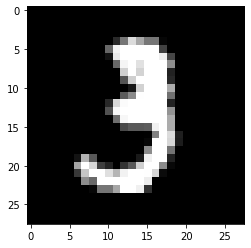

In [7]:
image,label = dataset[10]
plt.imshow(image, cmap = 'gray')
print('LABEL: ', label)

In [8]:
import torchvision.transforms as transforms

In [9]:
dataset = MNIST(root='data/',
                train = True,
                transform = transforms.ToTensor())

In [10]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label) # first dimension is for color. (height, width)

torch.Size([1, 28, 28]) 5


In [11]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


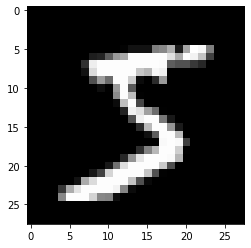

In [12]:
plt.imshow(img_tensor[0,:,:], cmap = 'gray')

## Training and Validation Datasets

While building real world machine learning models, it is quite common to split the dataset into 3 parts:

1. **Training set** - used `to train` the model i.e. compute the loss and adjust the weights of the model using gradient descent.
2. **Validation set** - used `
to evaluate the model while training`, adjust hyperparameters (learning rate etc.) and pick the best version of the model.
3. **Test set** - used `to compare different models`, or different types of modeling approaches, and report the final accuracy of the model.

In [13]:
import numpy as np

def split_indices(n, val_pct):
  # Determine the size of the validation set
  n_val = int(val_pct*n)
  # Create random permutation of 0 to n-1
  idxs = np.random.permutation(n)
  # Pick first n_val indices for validation set 
  return idxs[n_val:], idxs[:n_val]

In [14]:
train_indices, val_indices = split_indices(len(dataset), val_pct = 0.2)
print(len(train_indices), len(val_indices))
print("Sample val indices", val_indices[:20])

48000 12000
Sample val indices [ 3476 16712  7436 21566  9323 16597 10140 29669 16616  8053 10917 48398
 18686 25283 51592 13741 25578  2469 35215  5784]


In [15]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [16]:
batch_size = 100

# Training sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset,
                          batch_size,
                          sampler = train_sampler)

# Validation sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,
                        batch_size,
                        sampler = val_sampler)

# Model

Now that we have prepared our data loaders, we can define our model.

* A **logistic regression** model is almost identical to a linear regression model i.e. there are weights and bias matrices, and the output is obtained using simple matrix operations `pred = x @ w.t() + b`

* Just as we did with linear regression, we can use nn.Linear to create the model instead of defining and initializing the matrices manually.

* Since 'nn.Linear' expects the each training example to be a vector, each 1x28x28 image tensor needs to be flattened out into a vector size of 784 (`28x28`) before being passed into the model.

* The output for each image is vector of size 10, with each element of the vector signifying the probability a particular target label(i.e. 0 to 9). The predicted label for an image is simply the one with the highest probability.

In [17]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes) # (in, out)

print(model.weight.shape)
print(model.bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [18]:
for images, labels in train_loader:
  print(labels)
  print(images.shape)
  outputs = model(images)
  break

tensor([5, 0, 5, 2, 0, 3, 7, 1, 1, 7, 9, 1, 9, 6, 2, 3, 0, 7, 1, 6, 5, 6, 3, 4,
        1, 3, 1, 4, 8, 7, 3, 7, 5, 9, 8, 0, 4, 7, 9, 4, 7, 0, 7, 8, 7, 6, 4, 8,
        4, 7, 0, 5, 5, 6, 5, 3, 4, 9, 6, 4, 7, 7, 1, 6, 6, 0, 7, 2, 6, 1, 3, 4,
        8, 9, 9, 9, 3, 5, 4, 1, 0, 1, 5, 0, 1, 6, 1, 3, 6, 3, 2, 6, 2, 1, 5, 4,
        9, 0, 8, 6])
torch.Size([100, 1, 28, 28])


RuntimeError: ignored

In [19]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)
  def forward(self,xb):
    xb = xb.reshape(-1,input_size) # automatically calculates the -1
    out = self.linear(xb)
    return out

model = MnistModel()

Inside the `__init__` constructor method, we instantiate the weights and biases using `nn.Linear`. And inside the `forward` method, which is invoked when we pass a batch of inputs to the model, we flatten out the input tensor, and then pass it into `self.linear`.

`xb.reshape(-1, 28*28)` indicates to PyTorch that we want a *view* of the `xb` tensor with two dimensions, where the length along the 2nd dimension is 28\*28 (i.e. 784). One argument to `.reshape` can be set to `-1` (in this case the first dimension), to let PyTorch figure it out automatically based on the shape of the original tensor.

Note that the model no longer has `.weight` and `.bias` attributes (as they are now inside the `.linear` attribute), but it does have a `.parameters` method which returns a list containing the weights and bias, and can be used by a PyTorch optimizer.

In [20]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0157,  0.0212,  0.0268,  ..., -0.0148,  0.0221,  0.0354],
         [ 0.0214, -0.0010, -0.0335,  ...,  0.0037,  0.0012, -0.0014],
         [ 0.0010,  0.0106,  0.0256,  ...,  0.0160, -0.0155, -0.0298],
         ...,
         [-0.0195,  0.0161, -0.0147,  ...,  0.0147, -0.0290, -0.0080],
         [-0.0291,  0.0301,  0.0184,  ..., -0.0193, -0.0049,  0.0173],
         [-0.0259,  0.0008, -0.0321,  ..., -0.0170,  0.0218, -0.0183]],
        requires_grad=True), Parameter containing:
 tensor([-0.0173,  0.0153,  0.0135,  0.0051,  0.0247,  0.0054, -0.0056, -0.0271,
         -0.0066,  0.0148], requires_grad=True)]

In [21]:
for images, labels in train_loader:
  outputs = model(images)
  break

print('output.shape : ', outputs.shape)
print('Sample outputs : ', outputs[:2].data)

output.shape :  torch.Size([100, 10])
Sample outputs :  tensor([[-0.2829,  0.3806, -0.1261,  0.0604,  0.4462, -0.3495, -0.0357,  0.0325,
          0.3869,  0.1843],
        [-0.1961,  0.1953, -0.0557, -0.0006, -0.0329,  0.0495,  0.1149, -0.0881,
          0.2318,  0.2113]])


For each of the 100 input images, we get 10 outputs, one for each class. As discussed earlier, we'd like these outputs to represent probabilities, but for that the elements of each output row must lie between 0 to 1 and add up to 1, which is clearly not the case here. 

To convert the output rows into probabilities, we use the softmax function, which has the following formula:

![softmax](https://i.imgur.com/EAh9jLN.png)

First we replace each element `yi` in an output row by `e^yi`, which makes all the elements positive, and then we divide each element by the sum of all elements to ensure that they add up to 1. 

While it's easy to implement the softmax function (you should try it!), we'll use the implementation that's provided within PyTorch, because it works well with multidimensional tensors (a list of output rows in our case).

In [22]:
import torch.nn.functional as F

In [23]:
# apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# look at the sample probabilities
print('Sample Probabilities: ', probs[:2])

# Add up the probabilitiesof an output row
print('Sum:', torch.sum(probs[0]).item())

Sample Probabilities:  tensor([[0.0679, 0.1318, 0.0794, 0.0957, 0.1407, 0.0635, 0.0869, 0.0931, 0.1326,
         0.1083],
        [0.0780, 0.1154, 0.0898, 0.0949, 0.0919, 0.0997, 0.1065, 0.0869, 0.1197,
         0.1173]], grad_fn=<SliceBackward>)
Sum: 0.9999999403953552


In [24]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)
print(labels)

tensor([4, 8, 8, 5, 5, 9, 5, 8, 1, 2, 4, 8, 8, 2, 8, 2, 8, 4, 4, 9, 9, 9, 5, 4,
        9, 9, 2, 8, 4, 9, 1, 9, 1, 1, 4, 1, 4, 4, 8, 5, 2, 9, 2, 5, 8, 4, 8, 1,
        1, 1, 3, 8, 8, 9, 9, 8, 5, 8, 9, 2, 1, 9, 9, 1, 1, 9, 3, 3, 9, 1, 1, 1,
        8, 8, 8, 8, 9, 8, 8, 8, 5, 1, 1, 4, 8, 4, 1, 8, 6, 8, 4, 1, 1, 9, 3, 1,
        8, 1, 1, 9])
tensor([0.1407, 0.1197, 0.1399, 0.1193, 0.1273, 0.1288, 0.1410, 0.1263, 0.1377,
        0.1264, 0.1404, 0.1273, 0.1365, 0.1356, 0.1187, 0.1243, 0.1506, 0.1261,
        0.1255, 0.1186, 0.1209, 0.1442, 0.1327, 0.1376, 0.1204, 0.1322, 0.1461,
        0.1342, 0.1279, 0.1264, 0.1559, 0.1149, 0.1402, 0.1326, 0.1283, 0.1349,
        0.1627, 0.1181, 0.1336, 0.1222, 0.1214, 0.1446, 0.1241, 0.1213, 0.1309,
        0.1357, 0.1341, 0.1222, 0.1476, 0.1271, 0.1214, 0.1108, 0.1268, 0.1250,
        0.1239, 0.1181, 0.1193, 0.1450, 0.1301, 0.1480, 0.1399, 0.1271, 0.1367,
        0.1227, 0.1295, 0.1240, 0.1347, 0.1304, 0.1360, 0.1185, 0.1495, 0.1420,
        0.1204, 0.1

# Evaluation Metric and Loss Function

In [25]:
def accuracy(l1,l2):
  return torch.sum(l1==l2).item() / len(l1)

In [26]:
accuracy(preds, labels)

0.17

While the accuracy is a great way for us (humans) to evaluate the model, it can't be used as a loss function for optimizing our model using gradient descent, for the following reasons:

1. It's not a differentiable function. `torch.max` and `==` are both non-continuous and non-differentiable operations, so we can't use the accuracy for computing gradients w.r.t the weights and biases.

2. It doesn't take into account the actual probabilities predicted by the model, so it can't provide sufficient feedback for incremental improvements. 

Due to these reasons, accuracy is a great **evaluation metric** for classification, but **not a good loss function**. A commonly used loss function for classification problems is the **cross entropy**, which has the following formula:

![cross-entropy](https://i.imgur.com/VDRDl1D.png)

While it looks complicated, it's actually quite simple:

* For each output row, pick the predicted probability for the correct label. E.g. if the predicted probabilities for an image are `[0.1, 0.3, 0.2, ...]` and the correct label is `1`, we pick the corresponding element `0.3` and ignore the rest.

* Then, take the [logarithm](https://en.wikipedia.org/wiki/Logarithm) of the picked probability. If the probability is high i.e. close to 1, then its logarithm is a very small negative value, close to 0. And if the probability is low (close to 0), then the logarithm is a very large negative value. We also multiply the result by -1, which results is a large postive value of the loss for poor predictions.

* Finally, take the average of the cross entropy across all the output rows to get the overall loss for a batch of data.

Unlike accuracy, cross-entropy is a continuous and differentiable function that also provides good feedback for incremental improvements in the model (a slightly higher probability for the correct label leads to a lower loss). This makes it a good choice for the loss function. 

As you might expect, PyTorch provides an efficient and tensor-friendly implementation of cross entropy as part of the `torch.nn.functional` package. Moreover, it also performs softmax internally, so we can directly pass in the outputs of the model without converting them into probabilities.

In [27]:
loss_fn = F.cross_entropy

In [28]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3082, grad_fn=<NllLossBackward>)


Since the cross entropy is the negative logarithm of the predicted probability of the correct label averaged over all training samples, one way to interpret the resulting number e.g. `2.23` is look at `e^-2.23` which is around `0.1` as the predicted probability of the correct label, on average. *Lower the loss, better the model.*

In [29]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training the Model

Now that we have defined the `data loaders`, `model`, `loss function` and `optimizer`, we are ready to train the model. The training process is identical to linear regression, with the addition of a "validation phase" to evaluate the model in each epoch. Here's what it looks like in pseudocode:

```
for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection
```

Begin by defining a function 'loss_batch' which:

* Calculates the loss for a batch of data
* Optionally performs gradient descent update step if an optimizer is provided
* optionally computes a metric (e.g. accuracy) using predictions and actual targets


In [35]:
def loss_batch(model, loss_func, xb, yb, opt = None, metric = None):
  # Calculate the loss for a batch of data
  preds = model(xb)
  loss = loss_func(preds, yb)

  if opt:
    # Compute Gradients
    loss.backward()
    # Update parameters
    opt.step()
    # Reset grads
    opt.zero_grad()

  metric_result = None
  if metric:
    metric_result = metric(preds,yb)
  return loss.item(), len(xb), metric_result

Next define an evaluate function which calculates the overall loss(and a metric, if provided) for the validation dataset

In [37]:
def evaluate(model, loss_fn, valid_dl, metric = None):
  # For the validation set we are not required to calculate gradient
  with torch.no_grad():
    # Pass each batch throught the model
    results = [loss_batch(model, loss_fn, xb, yb, metric = metric) \
               for xb,yb in valid_dl]

    # Separate losses, counts and metrices
    # The * in a function call "unpacks" a list (or other iterable), 
    # making each of its elements a separate argument. 
    # So without the *, you're doing zip( [[1,2,3],[4,5,6]] ). 
    # With the *, you're doing zip([1,2,3], [4,5,6])
    losses, nums, metrics = zip(*results)

    # Total size of the dataset
    total = np.sum(nums)
    # Avg. loss accross batches 
    avg_loss = np.sum(np.multiply(losses, nums))/total
    avg_metric = None
  if metric:
    avg_metric = np.sum(np.multiply(metrics, nums))/total

  return avg_loss, total, avg_metric

In [33]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.sum(preds == labels).item() / len(preds)

Note that we **do not need to apply softmax** to the outputs since it does not change the relative order of the results. This is because $e^x$ is an increasing function of $x$. That is if $x_1 > x_2$ then $e^{x_1} > e^{x_2}$

In [39]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric = accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))

Loss: 2.3123, Accuracy: 0.1104


It's good that it has similiar initial values with the training sets. It shows us that validation set is well prepared.

In [42]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
  for epoch in range(epochs):
    for xb, yb in train_dl:
      # Training
      loss,_,_ = loss_batch(model, loss_fn, xb, yb, opt)
      # Evaluation
      val_loss, total, val_metric = evaluate(model, loss_fn, valid_dl, metric)

    # Print Progress
    if metric:
      print('Epoch: [{}/{}], Loss: {:.4f}, {}: {:.4f}'\
            .format(epoch+1, epochs, val_loss, metric.__name__, val_metric))
    else:
      print('Epoch: [{}/{}], Loss: {:.4f}'\
            .format(epoch+1, epochs, val_loss))

In [43]:
# Redefine the model and the optimizer

model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch: [1/5], Loss: 1.8656, accuracy: 0.6707
Epoch: [2/5], Loss: 1.5703, accuracy: 0.7530


KeyboardInterrupt: ignored

In [45]:
# Define test dataset
test_dataset = MNIST(root='data/',
                     train = False,
                     transform =transforms.ToTensor())


Shape: torch.Size([1, 28, 28])
Label: 7


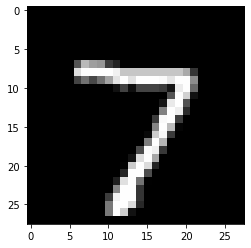

In [46]:
# A sample from the dataset

img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [49]:
def predict_image(img, model):
  xb = img.unsqueeze(0) # creates a batch out of an image
  yb = model(xb)
  _,preds = torch.max(yb,dim=1)
  return preds[0].item()

Shape: torch.Size([1, 28, 28])
Label:  5 Predicted:  2


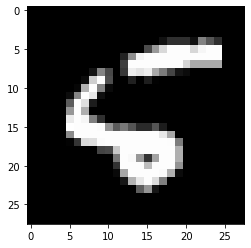

In [60]:
img, label = test_dataset[8]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label: ', label, 'Predicted: ', predict_image(img, model))

In [63]:
test_loader = DataLoader(test_dataset, batch_size = 200)
test_loss, total, test_acc =\
 evaluate(model, loss_fn, test_loader, metric = accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss, test_acc))

Loss: 1.4648, Accuracy: 0.7737


In [65]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [66]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0346, -0.0094,  0.0339,  ..., -0.0305,  0.0034, -0.0325],
                      [-0.0059,  0.0138,  0.0038,  ...,  0.0047,  0.0318,  0.0236],
                      [ 0.0052, -0.0194, -0.0176,  ...,  0.0058,  0.0060, -0.0157],
                      ...,
                      [ 0.0269, -0.0012, -0.0072,  ..., -0.0305,  0.0029,  0.0069],
                      [ 0.0329, -0.0138, -0.0006,  ...,  0.0029,  0.0279,  0.0075],
                      [ 0.0036, -0.0165,  0.0267,  ..., -0.0133,  0.0137, -0.0143]])),
             ('linear.bias',
              tensor([ 0.0008, -0.0023,  0.0319, -0.0223,  0.0232,  0.0096,  0.0054,  0.0181,
                      -0.0253, -0.0198]))])

In [67]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0346, -0.0094,  0.0339,  ..., -0.0305,  0.0034, -0.0325],
                      [-0.0059,  0.0138,  0.0038,  ...,  0.0047,  0.0318,  0.0236],
                      [ 0.0052, -0.0194, -0.0176,  ...,  0.0058,  0.0060, -0.0157],
                      ...,
                      [ 0.0269, -0.0012, -0.0072,  ..., -0.0305,  0.0029,  0.0069],
                      [ 0.0329, -0.0138, -0.0006,  ...,  0.0029,  0.0279,  0.0075],
                      [ 0.0036, -0.0165,  0.0267,  ..., -0.0133,  0.0137, -0.0143]])),
             ('linear.bias',
              tensor([ 0.0008, -0.0023,  0.0319, -0.0223,  0.0232,  0.0096,  0.0054,  0.0181,
                      -0.0253, -0.0198]))])

In [68]:
test_loader = DataLoader(test_dataset, batch_size = 200)
test_loss, total, test_acc =\
 evaluate(model2, loss_fn, test_loader, metric = accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss, test_acc))

Loss: 1.4648, Accuracy: 0.7737
